In [12]:
# Main data packages. 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [20]:
df = pd.read_csv("../../data_cleaned/merged/Merge_all_prices_load_gen_res.csv", delimiter=",")
#df

In [10]:
df.head(3)

,date,year,month,day,dayofyear,hour,week,dayofweek,price,period_start_utc,...,off_wind_da,off_wind_act,on_wind_da,on_wind_act,solar_da,solar_act,gen_forecast_da,gen_actual,res_sum_da,res_sum_act
0,2015-01-04,2015,1,4,4,23,1,6,22.34,2015-01-04 23:00:00,...,192.125,478.0200,11675.5250,14223.2775,0.0,0.1700,NaN,57028.5925,11867.6500,14701.4675
1,2015-01-05,2015,1,5,5,0,2,0,17.93,2015-01-05 00:00:00,...,192.375,468.5525,11924.5575,14207.5025,0.0,0.2075,NaN,56318.8525,12116.9325,14676.2625
2,2015-01-05,2015,1,5,5,1,2,0,15.17,2015-01-05 01:00:00,...,195.000,465.5550,12000.4075,14439.8025,0.0,0.1800,NaN,56216.6000,12195.4075,14905.5375


In [37]:
df["conv_sum_da"] =  df["load_forecast_da"] - df["res_sum_da"]

df["mw_per_eur"] = df["load_forecast_da"] / df["price"].replace(0, pd.NA)
#df["mw_per_eur"] = df["mw_per_eur"].fillna(0)

df["mw_res_per_eur"] = df["res_sum_da"] / df["price"].replace(0, pd.NA)
#df["mw_res_per_eur"] = df["mw_res_per_eur"].fillna(0)

df["mw_conv_per_eur"] = df["conv_sum_da"] / df["price"].replace(0, pd.NA)
#df["mw_conv_per_eur"] = df["mw_conv_per_eur"].fillna(0)


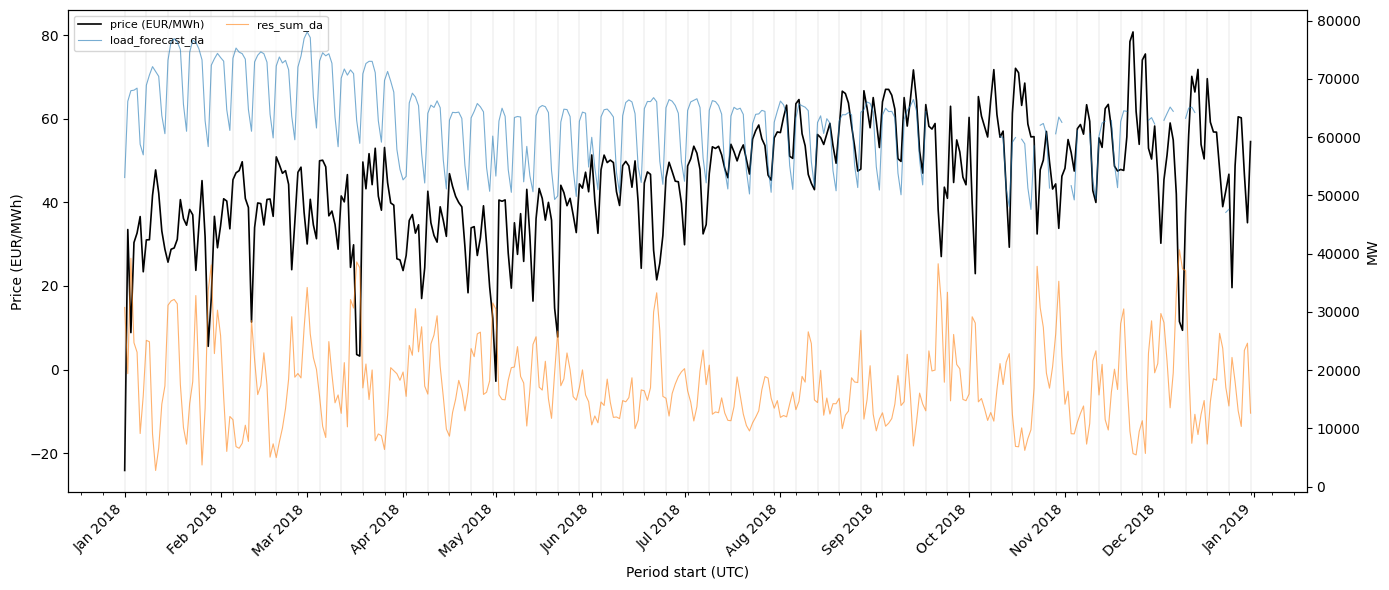

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

feature_cols = ["load_forecast_da", "res_sum_da"]

df_plot = df.copy()
df_plot["period_start_utc"] = pd.to_datetime(df_plot["period_start_utc"], errors="coerce")
years = [2018]
df_plot = df_plot[df_plot["year"].isin(years)].copy()
df_plot = df_plot.sort_values("period_start_utc")

df_daily = (
    df_plot
    .set_index("period_start_utc")[["price"] + feature_cols]
    .resample("D")
    .mean()
    .reset_index()
)

fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.plot(df_daily["period_start_utc"], df_daily["price"], color="black", linewidth=1.2, label="price (EUR/MWh)")
ax1.set_ylabel("Price (EUR/MWh)")
ax1.set_xlabel("Period start (UTC)")

ax2 = ax1.twinx()
for col in feature_cols:
    ax2.plot(df_daily["period_start_utc"], df_daily[col], alpha=0.6, linewidth=0.8, label=col)
ax2.set_ylabel("MW")

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left", ncol=2, fontsize=8)

# Better month labels + weekly lines
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax1.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right")

for dt in pd.date_range(
    df_daily["period_start_utc"].min(),
    df_daily["period_start_utc"].max(),
    freq="W-MON"
):
    ax1.axvline(dt, color="gray", linewidth=0.3, alpha=0.4)

plt.tight_layout()
plt.show()



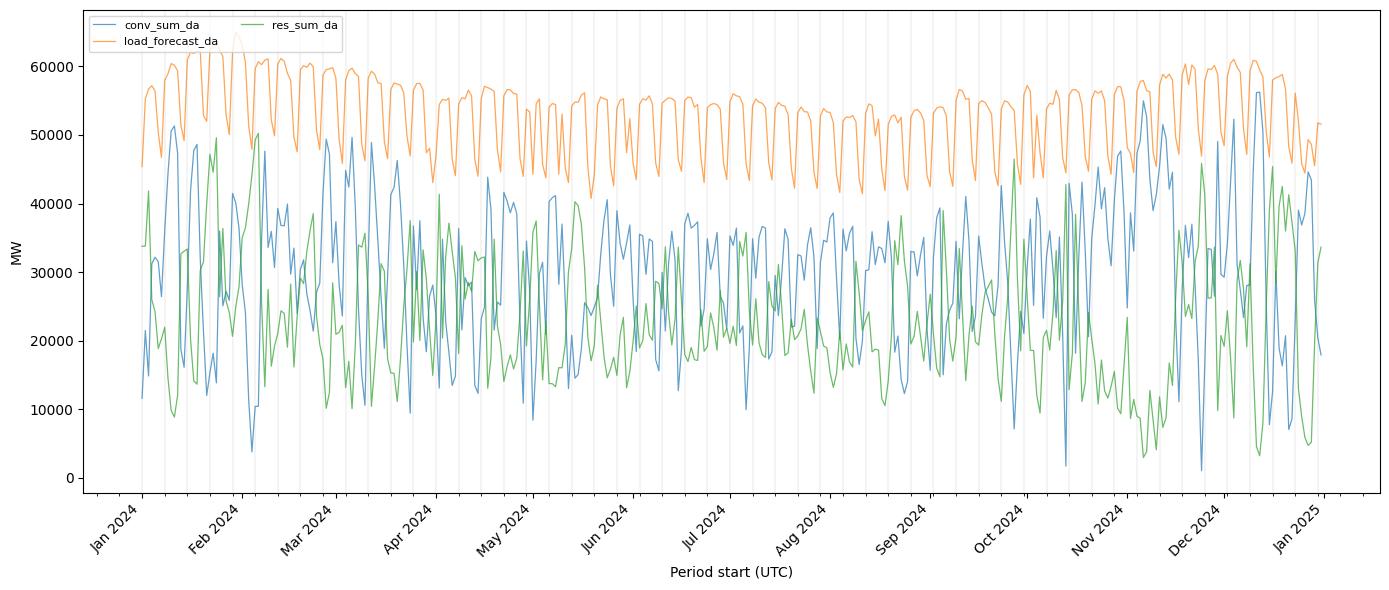

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates




# feature_cols = ["load_forecast_da", "res_sum_da"]
feature_cols =["conv_sum_da", "load_forecast_da", "res_sum_da"]
    #["mw_per_eur"] #,"mw_conv_per_eur", "mw_res_per_eur"]

df_plot = df.copy()
df_plot["period_start_utc"] = pd.to_datetime(df_plot["period_start_utc"], errors="coerce")
years = [2024]
df_plot = df_plot[df_plot["year"].isin(years)].copy()
df_plot = df_plot.sort_values("period_start_utc")

df_daily = (
    df_plot
    .set_index("period_start_utc")[feature_cols]
    .resample("D")
    .mean()
    .reset_index()
)

fig, ax = plt.subplots(figsize=(14, 6))

y_min = -300
y_max = 1700  # set your desired max

#ax.set_ylim(y_min, y_max)

for col in feature_cols:
    ax.plot(df_daily["period_start_utc"], df_daily[col], alpha=0.7, linewidth=0.9, label=col)

ax.set_ylabel("MW")
ax.set_xlabel("Period start (UTC)")

ax.legend(loc="upper left", ncol=2, fontsize=8)

# Better month labels + weekly lines
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %Y"))
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

for dt in pd.date_range(
    df_daily["period_start_utc"].min(),
    df_daily["period_start_utc"].max(),
    freq="W-MON"
):
    ax.axvline(dt, color="gray", linewidth=0.3, alpha=0.4)

plt.tight_layout()
plt.show()
